# Laboratorio Titanic: Modelo basado en reglas 


1. Cargar librerías
2. Cargar datos
3. Realizar análisis descriptivo
4. Realizar un modelo basado en reglas

![](https://static.dw.com/image/59775562_303.jpg)

## 1. Cargar librerías

In [1]:
import pandas as pd                # Manejo de tablas tipo excel
import numpy as np                 # Operaciones matriciales
import matplotlib.pyplot as plt    # Gráficas

## 2. Cargar datos

Si copiamos y pegamos la url directamente del drive, no nos va a servir. Debemos hacer un ajuste:

1. Originalmente la url viene así: `https://docs.google.com/spreadsheets/d/1TbWlLlviL59U-46xUNEVTHo_AwELKnFX/edit?usp=sharing&ouid=100484612747023237119&rtpof=true&sd=true`

2. Debemos quitar lo que está después de `/edit` (incluyéndolo) y reemplazar `spreadsheets/d/` por `uc?id=`. De tal manera que el resultado es el siguiente: `https://docs.google.com/uc?id=1TbWlLlviL59U-46xUNEVTHo_AwELKnFX`

In [2]:
url = 'https://docs.google.com/uc?id=1TbWlLlviL59U-46xUNEVTHo_AwELKnFX'
datos = pd.read_excel(url)
datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C


El significado de cada columna es el siguiente:

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survived | Survived                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

## 3. Análisis descriptivo

De acuerdo a la película del "Titanic" el `sex` era una variable muy importante para decidir si un pasajero sobrevivía o no. Vamos a tomar esta variable y la vamos a confrontar con nuestra variable objetivo `Survived`

*Nota: Aquí tuvimos la suerte de haber visto la película y de esta manera sabíamos que el sexo era importante, sin embargo en la mayoría de casos no tenemos una película de referencia para saberlo, en ese caso hay un trabajo arduo para la búsqueda de esas mejores variables*.

In [3]:
tabla = pd.crosstab(datos.Sex, datos.Survived, normalize='index', margins=True)
tabla

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


<AxesSubplot: xlabel='Sex'>

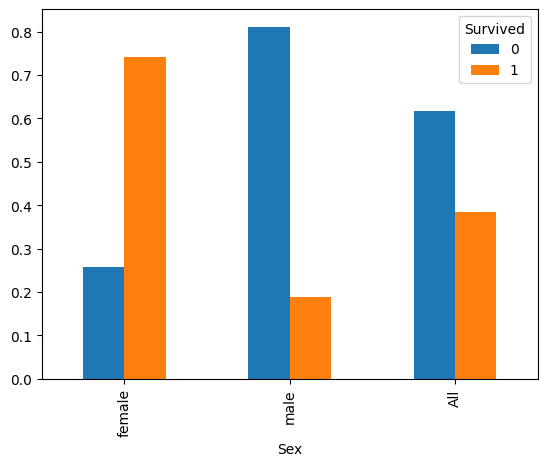

In [4]:
tabla.plot.bar()

**Análisis**

Se puede observar en la tabla y figura anterior que sin lugar a dudas ser mujer en el Titanic representaba una ventaja frente a los hombres. El 74% de mujeres sobrevivió frente a 19% de hombres. Decimos que el sexo es una variable importante para predecir la supervencia de los pasajeros.

### Ejercicio 1 (5 puntos):

Divida la variable `Age` en dos partes. Niños, aquellos menores o iguales a 12 años y jovenes_adultos, mayores a 12 años. Para  esto puede crear una nueva variable llamada `is_child`.

*Ayuda: Puede hacer uso del siguiente comando*: `datos['is_child'] = datos.Age<12`.

In [5]:
## Inserte su código aquí. 1 línea de código aprox. ##
## -------------------------------------------------##

## -------------------------------------------------##

### Ejercicio 2 (5 puntos):

1. Realice una tabla de contingencia y gráfico de barras de la variable `is_child` frente a la variable objetivo y escriba el correspondiente análisis.

In [6]:
  ## Inserte su código aquí. 3-4 línea de código aprox. ##
## -------------------------------------------------##

## -------------------------------------------------##

**Análisis**:

Realice su análisis aquí

## 4. Modelo basado en reglas
Un modelo basado en reglas es aquel que se construye con reglas duras (modelo heurístico). En este caso vamos a asumir que todas las mujeres sobreviven.

In [7]:
# Creamos una función que recibe X (var. explicativa), devuelve y (var. objetivo)
def pronosticos_modelo(X):
  y_pred = (X == 'female').astype(int).rename('Survived_pred')
  return y_pred

datos['y_pred'] = pronosticos_modelo(datos['Sex'])
datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y_pred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0


Ya tenemos un modelo que nos está devolviendo $y$ en función de $X$. Ahora queremos ver que tan bueno es nuestro modelo. La validación la vamos a hacer comparando los sobrevivientes reales vs los sobrevivientes pronóstico.

Sin embargo, en machine learning es importante reservar una parte de la tabla para específicamente probar modelos. A esta parte de la tabla le llamamos *test*.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Machine_learning_nutshell_--_Split_into_train-test_set.svg/1280px-Machine_learning_nutshell_--_Split_into_train-test_set.svg.png height=300>

Hay dos formas de separar la tabla. Usando la función `sample` de pandas o usando la función `train_test_split` de sklearn

In [8]:
# Método 1:
indices_test = datos.sample(frac=0.2, random_state=0).index
datos_test = datos.loc[indices_test]
datos_train = datos.loc[~datos.index.isin(indices_test)] # Me traigo los demás

X_train = datos_train['Sex']
y_train = datos_train['Survived']
X_test = datos_test['Sex']
y_test = datos_test['Survived']

In [9]:
# Método 2:
from sklearn.model_selection import train_test_split
X = datos['Sex']
y = datos['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Ahora vamos a validar nuestro modelo base. Para hacerlo vamos a comparar las dos columnas (real vs pred) y ver sus similitudes y diferencias

In [10]:
y_pred = pronosticos_modelo(X_test)
pd.concat([y_test, y_pred], axis=1)

,Survived,Survived_pred
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
780,1,1
837,0,0
215,1,1
833,0,0


Comparando estos 10 resultados mi modelo pronostica perfectamente. Será cierto?

Comparar uno a uno los resultados no parece tan buena idea. Es mejor utilizar una métrica que los resuma. Una de las métricas más utilizadas es el *accuracy* o *exactitud*. Su fórmula es la siguiente:

$$\text{accuracy} = \frac{\text{correctos}}{\text{total}}$$

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7877094972067039

**Análisis**

De acuerdo al *accuracy*, el 78.8% de las predicciones son correctas.

Otra métrica que se usa bastante es la matriz de confusión. Esta me permite observar los falsos positivos y negativos, como también los verdaderos positivos y negativos.

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[92, 18],
       [20, 49]])

Se lee así:
* Las filas son la realidad
* Las columnas los pronósticos
* 92 pasajeros que murieron, están siendo correctamente pronosticados como muertos (verdaderos negativos).
* 18 pasajeros que murieron, están siendo incorrectamente pronosticados, el modelo dice que sobreviven (falsos negativos).
* 20 pasajeros que sobrevivieron están siendo incorrectamente clasificados, el modelo dice que murieron (falsos positivos).
* 49 pasajeros que sobrevivieron están siendo correctamente clasificados, el modelo dice que sobreviven (verdaderos positivos).

### Ejercicio 3 (10 puntos):

Realice un modelo basado en la regla: `sólo los niños sobreviven` y evalúe su desempeño. ¿Qué tan bien se comporta frente al modelo basado en la regla `solo las mujeres sobreviven`?

*Nota: Es cierto que hay edades nulas y lo mejor sería buscar una estrategia de imputación. Para no hacer más complejo el ejercicio se omitirá este hecho. Pandas toma los valores nulos por defecto como False.*

In [13]:
## EScriba su modelo aquí. 1 línea de código aprox. ##
## -------------------------------------------------##

## -------------------------------------------------##

In [14]:
## Evalúe su modelo aquí. 1 línea de código aprox.  ##
## -------------------------------------------------##

## -------------------------------------------------##

### Ejercicio 4 (15 puntos):

Que tal si somos más precisos y ahora establecemos la regla `Mujeres y/o niños sobreviven`

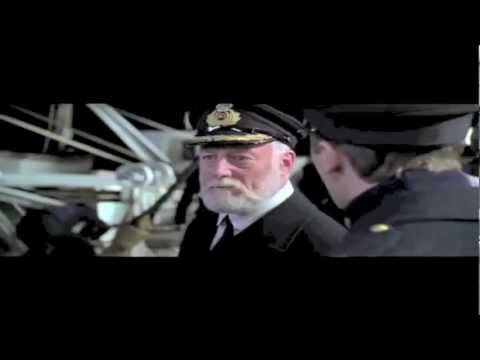

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('o4AynJBjqSA')

1. Para esto deberá crear una nueva variable, puede llamarla `women_child`.
2. Describirlo mediante una tabla de contingencia para ver si tiene sentido.
3. Realizar el modelo basado en reglas, evaluarlo y compararlo frente a otros modelos.

*Ayuda: Para el primer paso use sólo una de las siguientes estrategias:*
* Sobreviven mujeres **y** niños: `datos['women_child'] = (datos.is_child) & (datos.Sex=='female')`
* Sobreviven mujeres **o** niños: `datos['women_child'] = (datos.is_child) | (datos.Sex=='female')`

Piense cuál de las dos estrategias es la adecuada y porque

In [16]:
## Creación de variable. 1 línea de código aprox.   ##
## -------------------------------------------------##

## -------------------------------------------------##

In [17]:
## Descripción. 1 a 2 líneas de código aprox.       ##
## -------------------------------------------------##

## -------------------------------------------------##

**Análisis**:

Realice su análisis aquí

In [18]:
## Modelo y evaluación. 4 líneas de código aprox.   ##
## -------------------------------------------------##

## -------------------------------------------------##

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b01f3fd-002a-43ad-8b2f-83f22b9a4ee6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>